# Import

In [1]:
# Import cell 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def save_excel(file, path, file_name, file_type):
    with pd.ExcelWriter(f'{path}/{file_name}.{file_type}', engine = 'openpyxl') as writer:
        for sheet_name, df in file.items():
            df.to_excel(writer, sheet_name = sheet_name, index = False)

In [3]:
!pip install openpyxl

In [4]:
base_path = "/Users/Mahdi/quera_ai/projects/project1/Project1_data"

In [5]:
r99 = pd.read_excel(base_path + "/R99.xlsx", sheet_name=None, engine = 'openpyxl')

In [6]:
R99 = r99.copy()

In [7]:
file_list = [r99]
file_names = ['R99']

# R99Data

In [8]:
print(r99['R99Data'].columns)
r99['R99Data'] = r99['R99Data'][['Address', 'Fasl', 'weight', 'khanevartype', 'province','town']]

Index(['Address', 'MahMorajeh', 'Fasl', 'weight', 'khanevartype', 'Takmil',
       'TakmilDescA', 'TakmilDescB', 'TakmilDescC', 'Jaygozin',
       'JaygozinDescA', 'JaygozinDescB', 'JaygozinDescC', 'BlkAbdJaygozin',
       'RadifJaygozin', 'IsTel', 'FVam', 'province', 'town'],
      dtype='object')


In [9]:
r99['R99Data'].isna().mean()*100

Address         0.0
Fasl            0.0
weight          0.0
khanevartype    0.0
province        0.0
town            0.0
dtype: float64

# R99P1

In [10]:
r99['R99P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           9.309675
studying          27.853181
degree            27.854761
occupationalst    16.467317
maritalst         16.467317
dtype: float64

In [11]:
r99['R99P1']['age'] = r99['R99P1']['age'].astype(int)

In [12]:
max_age_illiterate = max(r99['R99P1'][r99['R99P1']['literacy'].isna()]['age'])
print(max_age_illiterate)
if max_age_illiterate > 6:
    max_age_illiterate = 6
r99['R99P1'].loc[(r99['R99P1']['literacy'].isna()) & (r99['R99P1']['age'] <= max_age_illiterate), 'literacy'] = 'illiterate'
r99['R99P1'].loc[(r99['R99P1']['studying'].isna()) & (r99['R99P1']['age'] <= max_age_illiterate), 'studying'] = 'No'

6


In [13]:
r99['R99P1'].loc[(r99['R99P1']['studying'].isna()) & (r99['R99P1']['literacy'] == 'illiterate'), 'studying'] = 'No'

In [14]:
r99['R99P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree            27.854761
occupationalst    16.467317
maritalst         16.467317
dtype: float64

In [15]:
r99['R99P1'].loc[(r99['R99P1']['studying'] == 'No') & (r99['R99P1']['degree'] == 'Other') & (r99['R99P1']['literacy'] == 'illiterate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [16]:
r99['R99P1'].loc[(r99['R99P1']['literacy'] == 'illiterate'), 'degree'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
r99['R99P1'].loc[(r99['R99P1']['literacy'] == 'illiterate'), 'degree'] = 'No degree'

In [18]:
r99['R99P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree             0.000000
occupationalst    16.467317
maritalst         16.467317
dtype: float64

In [19]:
r99['R99P1'].loc[r99['R99P1']['occupationalst'].isna(), 'occupationalst'] = 'Other'

In [20]:
r99['R99P1']['maritalst'].value_counts()

maritalst
Married     32074
Single      16993
Widowed      3190
Divorced      610
Name: count, dtype: int64

In [21]:
r99['R99P1'].loc[(r99['R99P1']['maritalst'].isna())]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
3,20011394629,4,Child,Male,5,illiterate,No,No degree,Other,NaN
33,20006389421,3,Child,Male,9,literate,Yes,Elemantry,Other,NaN
34,20006389421,4,Child,Male,3,illiterate,No,No degree,Other,NaN
43,20013397023,4,Child,Female,4,illiterate,No,No degree,Other,NaN
54,20010393415,4,Child,Female,5,illiterate,No,No degree,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
63265,23002704629,6,Child,Female,9,literate,Yes,Elemantry,Other,NaN
63266,23002704629,7,Child,Female,2,illiterate,No,No degree,Other,NaN
63268,23003706223,5,Child,Male,5,illiterate,No,No degree,Other,NaN
63286,23006709816,4,Child,Female,4,illiterate,No,No degree,Other,NaN


In [22]:
max_age_single = max(r99['R99P1'].loc[(r99['R99P1']['maritalst'].isna()), 'age'])
r99['R99P1'].loc[(r99['R99P1']['maritalst'].isna()) & (r99['R99P1']['relation'] == 'Child'), 'maritalst'] = 'Single'

In [23]:
r99['R99P1'].loc[(r99['R99P1']['maritalst'].isna()) & (r99['R99P1']['age'] <= max_age_single), 'maritalst'] = 'Single'

In [24]:
r99['R99P1'].isna().mean()*100

Address           0.0
member            0.0
relation          0.0
gender            0.0
age               0.0
literacy          0.0
studying          0.0
degree            0.0
occupationalst    0.0
maritalst         0.0
dtype: float64

# R99P2

In [25]:
missing_value_r99p2 = pd.DataFrame(r99['R99P2'].isna().mean()*100)
missing_value_r99p2 = missing_value_r99p2.reset_index()
missing_value_r99p2.columns = ['feature', 'percentage']
missing_value_r99p2[missing_value_r99p2['percentage'] > 0]

,feature,percentage
5,material,19.653718
42,cookingfuel,0.005479
43,heatingfuel,2.969700
44,waterheatingfuel,1.632787


In [26]:
cookingfuel_count = pd.DataFrame(r99['R99P2']['cookingfuel'].value_counts()).reset_index()
cookingfuel_count.columns = ['cookingfuel', 'count']
common_cookingfuel = cookingfuel_count.iloc[0, 0]

heatingfuel_count = pd.DataFrame(r99['R99P2']['heatingfuel'].value_counts()).reset_index()
heatingfuel_count.columns = ['heatingfuel', 'count']
common_heatingfuel = heatingfuel_count.iloc[0, 0]

waterheatingfuel_count = pd.DataFrame(r99['R99P2']['waterheatingfuel'].value_counts()).reset_index()
waterheatingfuel_count.columns = ['waterheatingfuel', 'count']
common_waterheatingfuel = waterheatingfuel_count.iloc[0, 0]

In [27]:
r99['R99P2'].loc[r99['R99P2']['cookingfuel'].isna(), 'cookingfuel'] = common_cookingfuel
r99['R99P2'].loc[r99['R99P2']['heatingfuel'].isna(), 'heatingfuel'] = common_heatingfuel
r99['R99P2'].loc[r99['R99P2']['waterheatingfuel'].isna(), 'waterheatingfuel'] = common_waterheatingfuel


In [28]:
missing_value_r99p2 = pd.DataFrame(r99['R99P2'].isna().mean()*100)
missing_value_r99p2 = missing_value_r99p2.reset_index()
missing_value_r99p2.columns = ['feature', 'percentage']
missing_value_r99p2[missing_value_r99p2['percentage'] > 0]

,feature,percentage
5,material,19.653718


Question is : Is there any way to fill material ? Is it valuable ?

# R99P3S01

In [29]:
r99['R99P3S01'].isna().mean()*100

Address       0.000000
code          0.000000
purchased     0.000000
gram         76.189482
kilogram     24.044922
price         9.444614
value         0.000201
dtype: float64

In [30]:
print(r99['R99P3S01'].columns)

r99['R99P3S01'].loc[(r99['R99P3S01']['kilogram'].isna()) & (~r99['R99P3S01']['price'].isna()), 'kilogram'] = r99['R99P3S01']['value'] / r99['R99P3S01']['price']


r99['R99P3S01'].loc[(~r99['R99P3S01']['kilogram'].isna()) & (r99['R99P3S01']['price'].isna()), 'price'] = r99['R99P3S01']['value'] / r99['R99P3S01']['kilogram']


r99['R99P3S01'] = r99['R99P3S01'].loc[~r99['R99P3S01']['kilogram'].isna() | ~r99['R99P3S01']['price'].isna()]


Index(['Address', 'code', 'purchased', 'gram', 'kilogram', 'price', 'value'], dtype='object')


In [31]:
print(r99['R99P3S01'].isna().mean()*100)

Address       0.000000
code          0.000000
purchased     0.000000
gram         73.706186
kilogram      0.000000
price         0.000000
value         0.000000
dtype: float64


In [32]:
r99['R99P3S01'] = r99['R99P3S01'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(r99['R99P3S01'].columns)


Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# R99P3S02

In [33]:
r99['R99P3S02'].isna().mean()*100


Address        0.000000
code           0.000000
purchased      0.000000
gram         100.000000
kilogram      20.728368
price         20.728368
value          0.000000
dtype: float64

In [34]:
r99['R99P3S02']['value'] = pd.to_numeric(r99['R99P3S02']['value'], errors='coerce')
r99['R99P3S02']['kilogram'] = pd.to_numeric(r99['R99P3S02']['kilogram'], errors='coerce')

In [35]:
r99['R99P3S02'].loc[(r99['R99P3S02']['kilogram'].isna()) & (~r99['R99P3S02']['price'].isna()), 'kilogram'] = r99['R99P3S02']['value'] / r99['R99P3S02']['price']
r99['R99P3S02'].loc[(~r99['R99P3S02']['kilogram'].isna()) & (r99['R99P3S02']['price'].isna()), 'price'] = r99['R99P3S02']['value'] / r99['R99P3S02']['kilogram']
r99['R99P3S02'] = r99['R99P3S02'].loc[~r99['R99P3S02']['kilogram'].isna() | ~r99['R99P3S02']['price'].isna()]

In [36]:
r99['R99P3S02'].isna().mean()*100


Address        0.0
code           0.0
purchased      0.0
gram         100.0
kilogram       0.0
price          0.0
value          0.0
dtype: float64

In [37]:
r99['R99P3S02'] = r99['R99P3S02'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(r99['R99P3S02'].columns)

Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# R99P3S04

In [38]:
r99['R99P3S04'].isna().mean()*100

Address       0.000000
code          0.000000
mortgage     99.087000
purchased    23.303587
value         0.000000
dtype: float64

Question is : Is there any way to fill purchased & mortgage ?

In [39]:
r99['R99P3S04']['purchased'].value_counts()

purchased
1    50113
8     1432
2      296
5      134
3       75
        24
7        5
6        3
4        1
Name: count, dtype: int64

In [40]:
r99['R99P3S04'].loc[(r99['R99P3S04']['purchased'].isna()) & (~r99['R99P3S04']['mortgage'].isna())]

,Address,code,mortgage,purchased,value


In [41]:
r99['R99P3S04'].loc[r99['R99P3S04']['purchased'].isna(), 'code'].value_counts()

code
42111    15794
42211       31
Name: count, dtype: int64

In [42]:
pd.set_option('display.max_rows', None)
grouped = r99['R99P3S04'].groupby('Address').filter(lambda x: ((x['code'] == 41111).any()) | ((x['code'] == 41112).any()))
print(grouped[((grouped.code == 41111) | (grouped.code == 41111) | (grouped.code == 42111) | (grouped.code == 42211))])
pd.reset_option('display.max_rows')

           Address   code  mortgage purchased     value
211    20001384620  41111       NaN         1   6500000
281    20006390219  41111       NaN         1   2000000
309    20007391415  41111       NaN         1   2500000
420    20001384226  41111       NaN         1   6000000
468    20010393814  41111       NaN         1   1500000
652    20001385018  41111       NaN         1   6500000
1103   20102398826  41111       NaN         1   5000000
1260   20206409126  41111       NaN         1   4900000
1400   20207409920  41111       NaN         1   2000000
1416   20210410717  41111       NaN         1  10000000
1421   20210410729  41111       NaN         1   6000000
1426   20210410720  41111       NaN         1   2700000
1436   20205408729  41111       NaN         1   3000000
1439   20205408326  41111       NaN         1  16000000
1681   20208410326  41111       NaN         1   5000000
2221   20325427117  41111       NaN         1   1000000
2393   20410435817  41111       NaN         1   

# R99P3S[03 + 05 - 12]

In [43]:
# All files are clean except R99P3S10
# R99P3S10 is empty

r99['R99P3S10']

,Address,code,purchased,value


# R99P3S13

In [44]:
print(r99['R99P3S13'].isna().mean()*100)
print(f"len r99['R99P3S13'] = {len(r99['R99P3S13'])}")
print(f"len nan value in r99['R99P3S13'] = {len(r99['R99P3S13'][r99['R99P3S13']['value'].isna()])}")
r99['R99P3S13'][r99['R99P3S13']['value'].isna()]

Address    0.000000
code       0.000000
value      0.281687
dtype: float64
len r99['R99P3S13'] = 183537
len nan value in r99['R99P3S13'] = 517


,Address,code,value
213,20006390626,71116,NaN
614,20007391415,71116,NaN
615,20007391415,123111,NaN
1178,20003386626,71116,NaN
1202,20012396629,71211,NaN
...,...,...,...
182440,23002704616,71116,NaN
182442,23002704616,123111,NaN
182653,23002704213,71116,NaN
182856,23002701814,123111,NaN


Fill Null values with median

In [45]:
r99['R99P3S13'].loc[r99['R99P3S13']['value'] == '          ', 'value'] = None
r99['R99P3S13']['value'] = r99['R99P3S13']['value'].astype('float64')
p3s13_median = r99['R99P3S13'][~r99['R99P3S13']['value'].isna()]['value'].median()
r99['R99P3S13']['value'] = r99['R99P3S13']['value'].fillna(p3s13_median)

Question is : Is there any way to fill value ?

# R99P3S14

In [46]:
r99['R99P3S14'].isna().mean()*100

Address      0.000000
code         0.000000
purchased    4.740244
value        5.242997
dtype: float64

Question is : Is there any way to fill purchased & value ?

# R99P4S01

In [47]:
r99['R99P4S01'].isna().mean()*100

Address            0.000000
member             0.000000
employed_w         0.000000
ISCO_w             0.000000
ISIC_w             0.000000
status_w           0.000000
hours_w           10.985579
days_w            10.985579
income_w_m         0.000000
income_w_y         0.000000
wage_w_m           0.128594
wage_w_y           0.009185
perk_w_m           0.082667
perk_w_y           0.018371
netincome_w_m      0.000000
netincome_w_y      0.000000
Fasl               0.000000
year               0.000000
DYCOL00          100.000000
dtype: float64

In [48]:
R99_P4S01_mahdi = r99['R99P4S01'][['Address', 'member', 'employed_w', 'ISCO_w', 'ISIC_w', 'status_w' , 'hours_w', 'days_w','income_w_y', 'wage_w_y', 'perk_w_y', 'netincome_w_y', 'Fasl', 'year']]
R99_P4S01_mahdi.isna().mean()*100

Address           0.000000
member            0.000000
employed_w        0.000000
ISCO_w            0.000000
ISIC_w            0.000000
status_w          0.000000
hours_w          10.985579
days_w           10.985579
income_w_y        0.000000
wage_w_y          0.009185
perk_w_y          0.018371
netincome_w_y     0.000000
Fasl              0.000000
year              0.000000
dtype: float64

In [49]:
print(R99_P4S01_mahdi[R99_P4S01_mahdi['wage_w_y'].isna()].index)
print(R99_P4S01_mahdi[R99_P4S01_mahdi['perk_w_y'].isna()].index)
R99_P4S01_mahdi[(R99_P4S01_mahdi['perk_w_y'].isna()) | (R99_P4S01_mahdi['wage_w_y'].isna())]

Index([9360], dtype='int64')
Index([98, 9360], dtype='int64')


,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
98,20011395020,1,1,9314,41000,3,8.0,4.0,50000000,0.0,NaN,50000000,1,1399
9360,21202529429,1,1,9314,41000,3,8.0,6.0,80000000,NaN,NaN,80000000,4,1399


In [50]:
R99_P4S01_mahdi = R99_P4S01_mahdi[~R99_P4S01_mahdi['hours_w'].isna()]
R99_P4S01_mahdi = R99_P4S01_mahdi[~R99_P4S01_mahdi['days_w'].isna()]

In [51]:
X = R99_P4S01_mahdi[(~R99_P4S01_mahdi['perk_w_y'].isna()) & (~R99_P4S01_mahdi['wage_w_y'].isna())].drop(['Address', 'member', 'wage_w_y', 'perk_w_y'], axis = 1)
y1 = R99_P4S01_mahdi[(~R99_P4S01_mahdi['perk_w_y'].isna()) & (~R99_P4S01_mahdi['wage_w_y'].isna())]['wage_w_y']
y2 = R99_P4S01_mahdi[(~R99_P4S01_mahdi['perk_w_y'].isna()) & (~R99_P4S01_mahdi['wage_w_y'].isna())]['perk_w_y']

X_train, X_validation, y1_train, y1_validation = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_validation, y2_train, y2_validation = train_test_split(X, y2, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y1_train)
y1_pred_validation = model.predict(X_validation)
mean_squared_error_1 = mean_squared_error(y1_validation, y1_pred_validation)
r2_score_1 = r2_score(y1_validation, y1_pred_validation)
print("--- wage_w_y ---")
print(f"mean_squared_error = {mean_squared_error_1}")
print(f"r2_score = {r2_score_1}")

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- RandomForestRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

model = GradientBoostingRegressor()
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- GradientBoostingRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

--- wage_w_y ---
mean_squared_error = 272519386201926.12
r2_score = 0.9890579060199243
--- perk_w_y ---
--- RandomForestRegressor ---
mean_squared_error = 214645345292454.44
r2_score = 0.4604205227871263
--- perk_w_y ---
--- GradientBoostingRegressor ---
mean_squared_error = 219346729827739.62
r2_score = 0.44860209455021527


In [52]:
R99_P4S01_mahdi = R99_P4S01_mahdi.loc[(~R99_P4S01_mahdi['perk_w_y'].isna()) | (~R99_P4S01_mahdi['wage_w_y'].isna())]

# R99P4S02

In [53]:
r99['R99P4S02'].isna().mean()*100

Address              0.000000
member               0.007724
employed_s           0.007724
ISCO_s               0.023173
ISIC_s               0.023173
status_s             0.007724
agriculture          0.000000
hours_s              1.313147
days_s               1.266801
cost_employment     11.084505
cost_raw             2.533601
cost_machinery      10.528349
cost_others          5.770122
cost_tax            13.973428
sale                 1.676193
income_s_y           0.007724
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [54]:
r99['R99P4S02'].columns

Index(['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s',
       'agriculture', 'hours_s', 'days_s', 'cost_employment', 'cost_raw',
       'cost_machinery', 'cost_others', 'cost_tax', 'sale', 'income_s_y',
       'Fasl', 'year', 'DYCOL00'],
      dtype='object')

In [55]:
R99_P4S02_mahdi = r99['R99P4S02'][['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s', 'agriculture', 'sale', 'income_s_y', 'Fasl', 'year']]
R99_P4S02_mahdi = R99_P4S02_mahdi[(~R99_P4S02_mahdi['employed_s'].isna()) & (~R99_P4S02_mahdi['ISCO_s'].isna()) & (~R99_P4S02_mahdi['ISIC_s'].isna()) & (~R99_P4S02_mahdi['status_s'].isna()) & (~R99_P4S02_mahdi['agriculture'].isna())]

In [56]:
R99_P4S02_mahdi.isna().mean()*100

Address        0.000000
member         0.000000
employed_s     0.000000
ISCO_s         0.000000
ISIC_s         0.000000
status_s       0.000000
agriculture    0.000000
sale           1.668856
income_s_y     0.000000
Fasl           0.000000
year           0.000000
dtype: float64

In [57]:
print(len(R99_P4S02_mahdi[R99_P4S02_mahdi['sale'].isna()]))
print(len(R99_P4S02_mahdi[R99_P4S02_mahdi['sale'] == 0]))
print(len(R99_P4S02_mahdi[R99_P4S02_mahdi['income_s_y'].isna()]))
print(len(R99_P4S02_mahdi[R99_P4S02_mahdi['income_s_y'] == 0]))


216
2630
0
2711


In [58]:
R99_P4S02_mahdi[(R99_P4S02_mahdi['sale'] == 0) | (R99_P4S02_mahdi['sale'].isna())]['employed_s'].value_counts()

employed_s
1.0    2802
2.0      44
Name: count, dtype: int64

In [59]:
R99_P4S02_mahdi[(R99_P4S02_mahdi['income_s_y'] == 0) | (R99_P4S02_mahdi['income_s_y'].isna())]['employed_s'].value_counts()

employed_s
1.0    2671
2.0      40
Name: count, dtype: int64

In [60]:
R99_P4S02_mahdi.loc[((R99_P4S02_mahdi['income_s_y'] == 0) | (R99_P4S02_mahdi['income_s_y'].isna())) & (R99_P4S02_mahdi['employed_s'] == 2), 'income_s_y'] = 0
R99_P4S02_mahdi.loc[((R99_P4S02_mahdi['sale'] == 0) | (R99_P4S02_mahdi['sale'].isna())) & (R99_P4S02_mahdi['employed_s'] == 2), 'sale'] = 0

In [61]:
X = R99_P4S02_mahdi[~R99_P4S02_mahdi['sale'].isna()].drop(['Address', 'member', 'sale'], axis = 1)
y1 = R99_P4S02_mahdi[~R99_P4S02_mahdi['sale'].isna()]['sale']
X_train, X_validation, y_train, y_validation = train_test_split(X, y1, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

r2_score = 0.1352878520047055
r2_score = 0.22977427754149127
r2_score = 0.23789153730849444
r2_score = 0.3136553552112


In [62]:
R99_P4S02_mahdi = R99_P4S02_mahdi[~R99_P4S02_mahdi['sale'].isna()]

# R99P4S03

In [63]:
r99['R99P4S03'].isna().mean()*100

Address              0.000000
member               0.008337
income_pension      67.703210
income_rent         72.551063
income_interest     33.509796
income_aid          21.117132
income_resale       74.568570
income_transfer     61.950813
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [64]:
r99_P4S03_mahdi = r99['R99P4S03'].drop(['DYCOL00'], axis = 1)

# R99_P4S04

In [65]:
r99['R99P4S04'].isna().mean()*100

Address             0.000000
member              0.000000
subsidy_number      0.017189
subsidy_month       0.003438
subsidy             0.006876
Fasl                0.000000
year                0.000000
DYCOL00           100.000000
dtype: float64

In [66]:
r99_P4S04_mahdi = r99['R99P4S04'].drop(['DYCOL00'], axis = 1)

# Mahdi's Files

In [67]:
R99_P4S01_mahdi
R99_P4S02_mahdi
r99_P4S03_mahdi
r99_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,20011394629,1,4.0,12.0,21840000.0,1,1399
1,20011394626,1,4.0,12.0,21840000.0,1,1399
2,20011394623,1,3.0,12.0,16380000.0,1,1399
3,20011394614,1,3.0,12.0,16380000.0,1,1399
4,20012395829,1,2.0,12.0,10920000.0,1,1399
...,...,...,...,...,...,...,...
29083,23002702621,1,2.0,12.0,10920000.0,4,1399
29084,23002702626,1,1.0,12.0,3010000.0,4,1399
29085,23002702626,1,1.0,12.0,5460000.0,4,1399
29086,23002703013,1,2.0,12.0,10920000.0,4,1399


# R99_P4S01

In [68]:
R99_P4S01_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9689 entries, 0 to 10886
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        9689 non-null   int64  
 1   member         9689 non-null   int64  
 2   employed_w     9689 non-null   int64  
 3   ISCO_w         9689 non-null   int64  
 4   ISIC_w         9689 non-null   int64  
 5   status_w       9689 non-null   int64  
 6   hours_w        9689 non-null   float64
 7   days_w         9689 non-null   float64
 8   income_w_y     9689 non-null   int64  
 9   wage_w_y       9689 non-null   float64
 10  perk_w_y       9688 non-null   float64
 11  netincome_w_y  9689 non-null   int64  
 12  Fasl           9689 non-null   int64  
 13  year           9689 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [69]:
print(R99_P4S01_mahdi.shape)
test_duplicate = R99_P4S01_mahdi.drop_duplicates()
print(test_duplicate.shape)

(9689, 14)
(9689, 14)


In [70]:
R99_P4S01_mahdi_employed_no_income = R99_P4S01_mahdi[(R99_P4S01_mahdi['employed_w'] == 1) & (R99_P4S01_mahdi['netincome_w_y'] == 0)]
R99_P4S01_mahdi_unemployed_with_income = R99_P4S01_mahdi[(R99_P4S01_mahdi['employed_w'] == 2) & (R99_P4S01_mahdi['netincome_w_y'] != 0)]

print(len(R99_P4S01_mahdi))
print(len(R99_P4S01_mahdi_employed_no_income))
print(len(R99_P4S01_mahdi_unemployed_with_income))

9689
17
301


وضعیت اشتغال و حقوق گرفتن یکسری ناهماهنگی داره

In [71]:
R99_P4S01_mahdi_employed_no_income_condition = (R99_P4S01_mahdi['employed_w'] == 1) & (R99_P4S01_mahdi['netincome_w_y'] == 0)
R99_P4S01_mahdi_unemployed_with_income_condition = (R99_P4S01_mahdi['employed_w'] == 2) & (R99_P4S01_mahdi['netincome_w_y'] != 0)

R99_P4S01_mahdi_clean = R99_P4S01_mahdi[~(R99_P4S01_mahdi_employed_no_income_condition | R99_P4S01_mahdi_unemployed_with_income_condition)]
R99_P4S01_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9371 entries, 0 to 10886
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        9371 non-null   int64  
 1   member         9371 non-null   int64  
 2   employed_w     9371 non-null   int64  
 3   ISCO_w         9371 non-null   int64  
 4   ISIC_w         9371 non-null   int64  
 5   status_w       9371 non-null   int64  
 6   hours_w        9371 non-null   float64
 7   days_w         9371 non-null   float64
 8   income_w_y     9371 non-null   int64  
 9   wage_w_y       9371 non-null   float64
 10  perk_w_y       9370 non-null   float64
 11  netincome_w_y  9371 non-null   int64  
 12  Fasl           9371 non-null   int64  
 13  year           9371 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [72]:
R99_P4S01_family_netincome = R99_P4S01_mahdi_clean[['Address', 'netincome_w_y']]
R99_P4S01_family_netincome = R99_P4S01_family_netincome.groupby('Address')['netincome_w_y'].sum().reset_index()
R99_P4S01_family_netincome['Address'].is_unique
len(R99_P4S01_family_netincome)

7900

# R99_P4S02

In [73]:
R99_P4S02_mahdi

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,20011394626,3.0,1.0,6111.0,1110.0,5.0,1,2.600000e+08,1.280000e+08,1,1399
1,20011394626,3.0,1.0,6121.0,1440.0,5.0,1,2.950000e+08,8.700000e+07,1,1399
2,20011394623,1.0,1.0,6121.0,1440.0,5.0,1,1.240000e+08,5.155000e+07,1,1399
3,20011394614,1.0,1.0,6111.0,1110.0,5.0,1,3.800000e+08,2.560000e+08,1,1399
4,20011394614,1.0,1.0,6121.0,1440.0,5.0,1,1.100000e+08,6.000000e+07,1,1399
...,...,...,...,...,...,...,...,...,...,...,...
12941,23006708623,1.0,1.0,8332.0,52240.0,5.0,2,7.200000e+08,7.200000e+08,4,1399
12942,23002704223,1.0,1.0,8322.0,49230.0,5.0,2,2.478000e+08,1.500000e+08,4,1399
12943,23003706213,1.0,1.0,7113.0,23950.0,5.0,2,6.000000e+08,6.000000e+08,4,1399
12944,23002702624,1.0,1.0,7111.0,41000.0,5.0,2,1.080000e+09,1.080000e+09,4,1399


In [74]:
print(R99_P4S02_mahdi.shape)
test_duplicate = R99_P4S02_mahdi.drop_duplicates()
print(test_duplicate.shape)

(12728, 11)
(12727, 11)


In [75]:
R99_P4S02_mahdi_employed_no_income = R99_P4S02_mahdi[(R99_P4S02_mahdi['employed_s'] == 1) & (R99_P4S02_mahdi['income_s_y'] == 0)]
R99_P4S02_mahdi_unemployed_with_income = R99_P4S02_mahdi[(R99_P4S02_mahdi['employed_s'] == 2) & (R99_P4S02_mahdi['income_s_y'] != 0)]

print(len(R99_P4S02_mahdi))
print(len(R99_P4S02_mahdi_employed_no_income))
print(len(R99_P4S02_mahdi_unemployed_with_income))

12728
2457
223


In [76]:
R99_P4S02_mahdi_employed_no_income[R99_P4S02_mahdi_employed_no_income['agriculture']!=2]

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
213,20202407523,2.0,1.0,6111.0,1120.0,6.0,1,0.0,0.0,1,1399
217,20202407514,2.0,1.0,6111.0,1120.0,6.0,1,0.0,0.0,1,1399
228,20220413913,3.0,1.0,6113.0,1300.0,6.0,1,0.0,0.0,1,1399
255,20207409526,2.0,1.0,9211.0,1240.0,6.0,1,0.0,0.0,1,1399
321,20306419120,3.0,1.0,6111.0,1110.0,6.0,1,0.0,0.0,1,1399
...,...,...,...,...,...,...,...,...,...,...,...
12855,22904693226,3.0,1.0,6121.0,1440.0,6.0,1,0.0,0.0,4,1399
12870,22903691626,2.0,1.0,6121.0,1440.0,6.0,1,0.0,0.0,4,1399
12871,22903691626,5.0,1.0,6121.0,1440.0,6.0,1,0.0,0.0,4,1399
12873,22903691229,2.0,1.0,6121.0,1440.0,6.0,1,0.0,0.0,4,1399


In [77]:
test_employment_income = r99['R99P4S02']

In [78]:
R99_P4S02_mahdi_employed_no_income_test = test_employment_income[(test_employment_income['employed_s'] == 1) & (test_employment_income['income_s_y'] == 0)]
R99_P4S02_selected_columns = R99_P4S02_mahdi_employed_no_income_test[['cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'sale','income_s_y']]
# R99_P4S02_mahdi_employed_no_income_test.info()
num_zero_or_nan_cost_raw = ((R99_P4S02_selected_columns['cost_others'] == 0) | R99_P4S02_selected_columns['cost_others'].isna()).sum()
print(len(R99_P4S02_mahdi_employed_no_income_test))
print(num_zero_or_nan_cost_raw)



2671
2670


In [79]:
not_zero_not_nan_cost_raw = R99_P4S02_selected_columns[(R99_P4S02_selected_columns['cost_others'] != 0) & R99_P4S02_selected_columns['cost_others'].notna()]
print(not_zero_not_nan_cost_raw)
print(len(not_zero_not_nan_cost_raw))

     cost_employment    cost_raw  cost_machinery  cost_others        sale  \
474       18000000.0  29500000.0             0.0   27000000.0  74500000.0   

     income_s_y  
474         0.0  
1


In [80]:
R99_P4S02_mahdi_employed_no_income_condition = (R99_P4S02_mahdi['employed_s'] == 1) & (R99_P4S02_mahdi['income_s_y'] == 0)
R99_P4S02_mahdi_unemployed_with_income_condition = (R99_P4S02_mahdi['employed_s'] == 2) & (R99_P4S02_mahdi['income_s_y'] != 0)

R99_P4S02_mahdi_clean = R99_P4S02_mahdi[~(R99_P4S02_mahdi_employed_no_income_condition | R99_P4S02_mahdi_unemployed_with_income_condition)]
R99_P4S02_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10048 entries, 0 to 12945
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      10048 non-null  int64  
 1   member       10048 non-null  float64
 2   employed_s   10048 non-null  float64
 3   ISCO_s       10048 non-null  float64
 4   ISIC_s       10048 non-null  float64
 5   status_s     10048 non-null  float64
 6   agriculture  10048 non-null  int64  
 7   sale         10048 non-null  float64
 8   income_s_y   10048 non-null  float64
 9   Fasl         10048 non-null  int64  
 10  year         10048 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 942.0 KB


In [81]:
R99_P4S02_family_netincome = R99_P4S02_mahdi_clean[['Address', 'income_s_y']]
R99_P4S02_family_netincome = R99_P4S02_family_netincome.groupby('Address')['income_s_y'].sum().reset_index()
R99_P4S02_family_netincome['Address'].is_unique
len(R99_P4S02_family_netincome)

7399

# R99_P4S03

In [82]:
r99_P4S03_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23990 entries, 0 to 23989
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          23990 non-null  int64  
 1   member           23988 non-null  float64
 2   income_pension   7748 non-null   object 
 3   income_rent      6585 non-null   object 
 4   income_interest  15951 non-null  float64
 5   income_aid       18924 non-null  float64
 6   income_resale    6101 non-null   float64
 7   income_transfer  9128 non-null   float64
 8   Fasl             23990 non-null  int64  
 9   year             23990 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 1.8+ MB


In [83]:
print(r99_P4S03_mahdi.shape)
test_duplicate = r99_P4S03_mahdi.drop_duplicates()
print(test_duplicate.shape)

(23990, 10)
(23990, 10)


In [84]:
r99_P4S03_mahdi.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20011394629,1.0,NaN,NaN,NaN,10320000.0,NaN,NaN,1,1399
1,20011394629,2.0,NaN,NaN,900000.0,NaN,NaN,NaN,1,1399
2,20011394626,1.0,NaN,NaN,NaN,11410000.0,NaN,NaN,1,1399
3,20011394626,2.0,NaN,NaN,1090000.0,NaN,NaN,NaN,1,1399
4,20011394623,1.0,NaN,NaN,NaN,12950000.0,NaN,NaN,1,1399


In [85]:
R99_P4S03_family_netincome = r99_P4S03_mahdi.copy()
R99_P4S03_family_netincome['income_pension'] = pd.to_numeric(R99_P4S03_family_netincome['income_pension'], errors='coerce')
R99_P4S03_family_netincome['income_rent'] = pd.to_numeric(R99_P4S03_family_netincome['income_rent'], errors='coerce')
R99_P4S03_family_netincome['income_transfer'] = pd.to_numeric(R99_P4S03_family_netincome['income_transfer'], errors='coerce')
R99_P4S03_family_netincome['income_resale'] = pd.to_numeric(R99_P4S03_family_netincome['income_resale'], errors='coerce')
R99_P4S03_family_netincome['income_interest'] = pd.to_numeric(R99_P4S03_family_netincome['income_interest'], errors='coerce')


In [86]:
R99_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23990 entries, 0 to 23989
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          23990 non-null  int64  
 1   member           23988 non-null  float64
 2   income_pension   7746 non-null   float64
 3   income_rent      6584 non-null   float64
 4   income_interest  15951 non-null  float64
 5   income_aid       18924 non-null  float64
 6   income_resale    6101 non-null   float64
 7   income_transfer  9128 non-null   float64
 8   Fasl             23990 non-null  int64  
 9   year             23990 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 1.8 MB


In [87]:
R99_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20011394629,1.0,NaN,NaN,NaN,10320000.0,NaN,NaN,1,1399
1,20011394629,2.0,NaN,NaN,900000.0,NaN,NaN,NaN,1,1399
2,20011394626,1.0,NaN,NaN,NaN,11410000.0,NaN,NaN,1,1399
3,20011394626,2.0,NaN,NaN,1090000.0,NaN,NaN,NaN,1,1399
4,20011394623,1.0,NaN,NaN,NaN,12950000.0,NaN,NaN,1,1399


In [88]:
R99_P4S03_family_netincome['total_income'] = (
    R99_P4S03_family_netincome['income_pension'].fillna(0) +
    R99_P4S03_family_netincome['income_rent'].fillna(0) +
    R99_P4S03_family_netincome['income_interest'].fillna(0) +
    R99_P4S03_family_netincome['income_aid'].fillna(0) +
    R99_P4S03_family_netincome['income_resale'].fillna(0) +
    R99_P4S03_family_netincome['income_transfer'].fillna(0)
)
R99_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,total_income
0,20011394629,1.0,NaN,NaN,NaN,10320000.0,NaN,NaN,1,1399,10320000.0
1,20011394629,2.0,NaN,NaN,900000.0,NaN,NaN,NaN,1,1399,900000.0
2,20011394626,1.0,NaN,NaN,NaN,11410000.0,NaN,NaN,1,1399,11410000.0
3,20011394626,2.0,NaN,NaN,1090000.0,NaN,NaN,NaN,1,1399,1090000.0
4,20011394623,1.0,NaN,NaN,NaN,12950000.0,NaN,NaN,1,1399,12950000.0


In [89]:
R99_P4S03_family_netincome.shape

(23990, 11)

In [90]:
R99_P4S03_family_netincome = R99_P4S03_family_netincome[['Address', 'total_income']]
R99_P4S03_family_netincome = R99_P4S03_family_netincome.groupby('Address')['total_income'].sum().reset_index()
R99_P4S03_family_netincome.shape

(17400, 2)

In [91]:
R99_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       17400 non-null  int64  
 1   total_income  17400 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 272.0 KB


# R99_P4S04

In [92]:
R99_P4S04_family_netincome = r99_P4S04_mahdi.copy()
R99_P4S04_family_netincome.info()
print(R99_P4S04_family_netincome.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29088 entries, 0 to 29087
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         29088 non-null  int64  
 1   member          29088 non-null  int64  
 2   subsidy_number  29083 non-null  float64
 3   subsidy_month   29087 non-null  float64
 4   subsidy         29086 non-null  float64
 5   Fasl            29088 non-null  int64  
 6   year            29088 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.6 MB
(29088, 7)


In [93]:
R99_P4S04_family_netincome = R99_P4S04_family_netincome[['Address', 'subsidy']]
R99_P4S04_family_netincome = R99_P4S04_family_netincome.groupby('Address')['subsidy'].sum().reset_index()
R99_P4S04_family_netincome.shape

(17717, 2)

# net income sources

In [94]:
R99_P4S01_family_netincome_column = R99_P4S01_family_netincome.rename(columns={'netincome_w_y': 'netincome'})
R99_P4S02_family_netincome_column = R99_P4S02_family_netincome.rename(columns={'income_s_y': 'netincome'})
R99_P4S03_family_netincome_column = R99_P4S03_family_netincome.rename(columns={'total_income': 'netincome'})
R99_P4S04_family_netincome_column = R99_P4S04_family_netincome.rename(columns={'subsidy': 'netincome'})
print(R99_P4S03_family_netincome_column.columns)
# isna??

Index(['Address', 'netincome'], dtype='object')


In [95]:
merged_df_netincome = R99_P4S01_family_netincome_column.merge(R99_P4S02_family_netincome_column, on='Address', how='outer', suffixes=('_P4S01', '_P4S02'))

R99_P4S03_family_netincome_column = R99_P4S03_family_netincome_column.rename(columns={'netincome': 'netincome_P4S03'})
merged_df_netincome = merged_df_netincome.merge(R99_P4S03_family_netincome_column, on='Address', how='outer')

R99_P4S04_family_netincome_column = R99_P4S04_family_netincome_column.rename(columns={'netincome': 'netincome_P4S04'})
merged_df_netincome = merged_df_netincome.merge(R99_P4S04_family_netincome_column, on='Address', how='outer')


merged_df_netincome = merged_df_netincome.fillna(0)
merged_df_netincome.head()

merged_df_netincome['total_netincome'] = (
    merged_df_netincome['netincome_P4S01'] +
    merged_df_netincome['netincome_P4S02'] +
    merged_df_netincome['netincome_P4S03'] +
    merged_df_netincome['netincome_P4S04']
)

In [96]:
total_net_income = merged_df_netincome
total_net_income.shape

(18245, 6)

In [97]:
total_net_income.describe()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
count,1.824500e+04,1.824500e+04,1.824500e+04,1.824500e+04,1.824500e+04,1.824500e+04
mean,2.146690e+10,1.205008e+08,1.099762e+08,8.469963e+07,1.725866e+07,3.324354e+08
std,9.087281e+08,1.903284e+08,2.377462e+08,1.577542e+08,8.612218e+06,2.983443e+08
min,2.000138e+10,0.000000e+00,-1.250000e+09,0.000000e+00,0.000000e+00,-1.246790e+09
25%,2.070747e+10,0.000000e+00,0.000000e+00,2.000000e+07,1.092000e+07,1.509800e+08
50%,2.140655e+10,0.000000e+00,0.000000e+00,3.268000e+07,1.638000e+07,2.757500e+08
75%,2.221063e+10,2.040000e+08,1.500000e+08,7.526000e+07,2.184000e+07,4.319640e+08
max,2.300671e+10,2.571660e+09,7.829700e+09,8.600000e+09,1.092000e+08,9.347660e+09


In [98]:
total_net_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18245 entries, 0 to 18244
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18245 non-null  int64  
 1   netincome_P4S01  18245 non-null  float64
 2   netincome_P4S02  18245 non-null  float64
 3   netincome_P4S03  18245 non-null  float64
 4   netincome_P4S04  18245 non-null  float64
 5   total_netincome  18245 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 855.4 KB


In [99]:
total_net_income.head()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
0,20001383916,281680008.0,0.0,30460000.0,21490000.0,333630008.0
1,20001383917,150000000.0,240000000.0,23760000.0,21490000.0,435250000.0
2,20001383919,240000000.0,0.0,42400000.0,26950000.0,309350000.0
3,20001383923,240000000.0,0.0,25560000.0,21490000.0,287050000.0
4,20001383929,130000000.0,24000000.0,19100000.0,10570000.0,183670000.0


In [100]:
# agriculture in urban?

In [101]:
r99_data = r99['R99Data']

In [102]:
r99_data.describe()

,Address,Fasl,weight,khanevartype,town
count,1.825100e+04,18251.000000,18251.000000,18251.000000,18251.000000
mean,2.146681e+10,2.507041,335.714098,1.000493,7.688346
std,9.087339e+08,1.116988,263.779655,0.022202,6.424863
min,2.000138e+10,1.000000,41.334962,1.000000,1.000000
25%,2.070747e+10,2.000000,141.412797,1.000000,3.000000
50%,2.140655e+10,3.000000,274.477076,1.000000,6.000000
75%,2.221063e+10,4.000000,461.788608,1.000000,10.000000
max,2.300671e+10,4.000000,3691.616067,2.000000,39.000000


In [103]:
r99_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       18251 non-null  int64  
 1   Fasl          18251 non-null  int64  
 2   weight        18251 non-null  float64
 3   khanevartype  18251 non-null  int64  
 4   province      18251 non-null  object 
 5   town          18251 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 855.6+ KB


In [104]:
r99_data.head()

,Address,Fasl,weight,khanevartype,province,town
0,20001383916,2,170.110792,1,Markazi,1
1,20001383917,2,170.110792,1,Markazi,1
2,20001383919,2,170.110792,1,Markazi,1
3,20001383923,2,170.110792,1,Markazi,1
4,20001383926,2,170.110792,1,Markazi,1


In [105]:
total_income_province = r99_data.merge(total_net_income, on='Address', how='left')

In [106]:
family_incomes_dataset= total_income_province.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [107]:
family_incomes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18251 non-null  int64  
 1   Fasl             18251 non-null  int64  
 2   weight           18251 non-null  float64
 3   khanevartype     18251 non-null  int64  
 4   province         18251 non-null  object 
 5   town             18251 non-null  int64  
 6   Hoghugh_Income   18245 non-null  float64
 7   Azad_Income      18245 non-null  float64
 8   Other_Income     18245 non-null  float64
 9   Yarane_Income    18245 non-null  float64
 10  total_netincome  18245 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.5+ MB


In [108]:
family_incomes_dataset.to_csv('family_incomes_dataset.csv', index=False)

In [109]:
total_income_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18251 entries, 0 to 18250
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18251 non-null  int64  
 1   Fasl             18251 non-null  int64  
 2   weight           18251 non-null  float64
 3   khanevartype     18251 non-null  int64  
 4   province         18251 non-null  object 
 5   town             18251 non-null  int64  
 6   netincome_P4S01  18245 non-null  float64
 7   netincome_P4S02  18245 non-null  float64
 8   netincome_P4S03  18245 non-null  float64
 9   netincome_P4S04  18245 non-null  float64
 10  total_netincome  18245 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 1.5+ MB


In [110]:
total_income_province.head()
unique_provinces = total_income_province['province'].unique()
print(unique_provinces)

['Markazi' 'Gilan' 'Mazandaran' 'AzarbaijanSharghi' 'AzarbaijanGharbi'
 'Kermanshah' 'Kouzestan' 'Fars' 'Kerman' 'KhorasanRazavi' 'Esfahan'
 'SistanBalouchestan' 'Kordestan' 'Hamedan' 'CharmahalBakhtiari'
 'Lorestan' 'Ilam' 'KohkilouyeBoyerahamad' 'Boushehr' 'Zanjan' 'Semnan'
 'Yazd' 'Hormozgan' 'Tehran' 'Ardebil' 'Qom' 'Qazvin' 'Golestan'
 'KhorasanShomali' 'KhorasanJonoubi' 'Alborz']


In [111]:
rural_chaharmahal_data = total_income_province[total_income_province['province']=='CharmahalBakhtiari']
rural_chaharmahal_data.head()
print(len(rural_chaharmahal_data))
nan_netincome_rows = rural_chaharmahal_data[rural_chaharmahal_data['total_netincome'].isna()]
print(nan_netincome_rows)

483
Empty DataFrame
Columns: [Address, Fasl, weight, khanevartype, province, town, netincome_P4S01, netincome_P4S02, netincome_P4S03, netincome_P4S04, total_netincome]
Index: []


# R99-CharmahalBakhtiari

In [112]:
rural_chaharmahal_data

,Address,Fasl,weight,khanevartype,province,town,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
8795,21401545215,2,132.595155,1,CharmahalBakhtiari,1,0.0,0.0,70000000.0,10570000.0,80570000.0
8796,21401545217,2,132.595155,1,CharmahalBakhtiari,1,0.0,0.0,31000000.0,5110000.0,36110000.0
8797,21401545221,2,132.595155,1,CharmahalBakhtiari,1,0.0,0.0,51880000.0,5110000.0,56990000.0
8798,21401545223,2,132.595155,1,CharmahalBakhtiari,1,0.0,105000000.0,32070000.0,10220000.0,147290000.0
8799,21401545226,2,132.595155,1,CharmahalBakhtiari,1,0.0,169500000.0,38240000.0,10570000.0,218310000.0
...,...,...,...,...,...,...,...,...,...,...,...
9273,21409553717,3,97.099927,1,CharmahalBakhtiari,9,342000000.0,150000000.0,31620000.0,20440000.0,544060000.0
9274,21409553720,3,97.099927,1,CharmahalBakhtiari,9,144000000.0,0.0,47130000.0,9520000.0,200650000.0
9275,21409553723,3,97.099927,1,CharmahalBakhtiari,9,0.0,410000000.0,50300000.0,31360000.0,491660000.0
9276,21409553726,3,97.099927,1,CharmahalBakhtiari,9,432000000.0,0.0,50920000.0,20440000.0,503360000.0


In [113]:
family_incomes_chaharmahal_dataset= rural_chaharmahal_data.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [114]:
family_incomes_chaharmahal_dataset.to_csv('family_incomes_chaharmahal_dataset.csv', index=False)

# R99 Members Income

In [115]:
R99_P4S01_mahdi_clean

,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
0,20011394629,1,1,9314,41000,3,8.0,1.0,72000000,72000000.0,0.0,72000000,1,1399
1,20011394623,1,1,9211,1500,3,8.0,7.0,80000000,80000000.0,0.0,80000000,1,1399
2,20011394623,3,1,9211,1500,3,8.0,2.0,100000000,100000000.0,0.0,100000000,1,1399
3,20012395826,3,1,9211,1500,3,8.0,3.0,90000000,90000000.0,0.0,90000000,1,1399
4,20006389426,1,1,4419,27320,3,8.0,6.0,804000000,711840000.0,12000000.0,723840000,1,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10882,23003705820,1,1,9212,1412,3,10.0,7.0,360000000,360000000.0,0.0,360000000,4,1399
10883,23001700220,1,1,8322,49220,1,10.0,7.0,480000000,480000000.0,0.0,480000000,4,1399
10884,23003706629,1,1,9314,41000,3,10.0,7.0,420000000,420000000.0,0.0,420000000,4,1399
10885,23006709417,1,1,8322,49220,3,10.0,7.0,500000000,500000000.0,0.0,500000000,4,1399


In [116]:
# check duplicate records for same members

duplicates = R99_P4S01_mahdi_clean[R99_P4S01_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_w  ISCO_w  ISIC_w  status_w  hours_w  \
200    20222414729       1           1    5224   47520         3      8.0   
201    20222414729       1           1    9214    1610         3      9.0   
208    20201406323       1           1    9211    1610         3      9.0   
209    20201406323       1           1    9314   41000         3      9.0   
211    20201406326       1           1    9211    1610         3      9.0   
...            ...     ...         ...     ...     ...       ...      ...   
10697  22904692820       1           1    1115   84110         1      8.0   
10713  22907696016       1           1    5153   43120         3      8.0   
10714  22907696016       1           1    9211    1110         3      5.0   
10825  22808687523       1           1    9212    1440         3      8.0   
10826  22808687523       1           1    9314   43900         3      8.0   

       days_w  income_w_y     wage_w_y    perk_w_y  netincome_w_y  Fasl  ye

In [117]:
R99_P4S02_mahdi_clean

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,20011394626,3.0,1.0,6111.0,1110.0,5.0,1,2.600000e+08,1.280000e+08,1,1399
1,20011394626,3.0,1.0,6121.0,1440.0,5.0,1,2.950000e+08,8.700000e+07,1,1399
2,20011394623,1.0,1.0,6121.0,1440.0,5.0,1,1.240000e+08,5.155000e+07,1,1399
3,20011394614,1.0,1.0,6111.0,1110.0,5.0,1,3.800000e+08,2.560000e+08,1,1399
4,20011394614,1.0,1.0,6121.0,1440.0,5.0,1,1.100000e+08,6.000000e+07,1,1399
...,...,...,...,...,...,...,...,...,...,...,...
12941,23006708623,1.0,1.0,8332.0,52240.0,5.0,2,7.200000e+08,7.200000e+08,4,1399
12942,23002704223,1.0,1.0,8322.0,49230.0,5.0,2,2.478000e+08,1.500000e+08,4,1399
12943,23003706213,1.0,1.0,7113.0,23950.0,5.0,2,6.000000e+08,6.000000e+08,4,1399
12944,23002702624,1.0,1.0,7111.0,41000.0,5.0,2,1.080000e+09,1.080000e+09,4,1399


In [118]:
# check duplicate records for same members

duplicates = R99_P4S02_mahdi_clean[R99_P4S02_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_s  ISCO_s   ISIC_s  status_s  \
0      20011394626     3.0         1.0  6111.0   1110.0       5.0   
1      20011394626     3.0         1.0  6121.0   1440.0       5.0   
3      20011394614     1.0         1.0  6111.0   1110.0       5.0   
4      20011394614     1.0         1.0  6121.0   1440.0       5.0   
5      20009393019     1.0         1.0  5224.0  47730.0       5.0   
...            ...     ...         ...     ...      ...       ...   
12894  22905694414     1.0         1.0  6111.0   1110.0       5.0   
12910  22904693626     1.0         1.0  6121.0   1440.0       5.0   
12911  22904693626     1.0         1.0  6112.0   1250.0       5.0   
12944  23002702624     1.0         1.0  7111.0  41000.0       5.0   
12945  23002702624     1.0         1.0  6111.0   1110.0       5.0   

       agriculture          sale    income_s_y  Fasl  year  
0                1  2.600000e+08  1.280000e+08     1  1399  
1                1  2.950000e+08  8.700000e+07   

In [119]:
r99_P4S03_mahdi

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20011394629,1.0,NaN,NaN,NaN,10320000.0,NaN,NaN,1,1399
1,20011394629,2.0,NaN,NaN,900000.0,NaN,NaN,NaN,1,1399
2,20011394626,1.0,NaN,NaN,NaN,11410000.0,NaN,NaN,1,1399
3,20011394626,2.0,NaN,NaN,1090000.0,NaN,NaN,NaN,1,1399
4,20011394623,1.0,NaN,NaN,NaN,12950000.0,NaN,NaN,1,1399
...,...,...,...,...,...,...,...,...,...,...
23985,23006709820,1.0,0222000000,0,0.0,6560000.0,0.0,50000000.0,4,1399
23986,23006709823,1.0,0,0,0.0,12360000.0,0.0,0.0,4,1399
23987,23006709826,1.0,0,0,0.0,16560000.0,0.0,0.0,4,1399
23988,23006709826,4.0,0,0,0.0,12360000.0,0.0,0.0,4,1399


In [120]:
# check duplicate records for same members

duplicates = r99_P4S03_mahdi[r99_P4S03_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, income_pension, income_rent, income_interest, income_aid, income_resale, income_transfer, Fasl, year]
Index: []


In [121]:
r99_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,20011394629,1,4.0,12.0,21840000.0,1,1399
1,20011394626,1,4.0,12.0,21840000.0,1,1399
2,20011394623,1,3.0,12.0,16380000.0,1,1399
3,20011394614,1,3.0,12.0,16380000.0,1,1399
4,20012395829,1,2.0,12.0,10920000.0,1,1399
...,...,...,...,...,...,...,...
29083,23002702621,1,2.0,12.0,10920000.0,4,1399
29084,23002702626,1,1.0,12.0,3010000.0,4,1399
29085,23002702626,1,1.0,12.0,5460000.0,4,1399
29086,23002703013,1,2.0,12.0,10920000.0,4,1399


In [122]:
# check duplicate records for same members

duplicates = r99_P4S04_mahdi[r99_P4S04_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  subsidy_number  subsidy_month     subsidy  Fasl  \
270    20110403213       1             2.0           12.0  10920000.0     1   
271    20110403213       1             1.0            7.0   3185000.0     1   
277    20102398826       1             1.0           10.0   4550000.0     1   
278    20102398826       1             2.0           12.0  10920000.0     1   
291    20104399614       1             1.0           12.0   5460000.0     1   
...            ...     ...             ...            ...         ...   ...   
29083  23002702621       1             2.0           12.0  10920000.0     4   
29084  23002702626       1             1.0           12.0   3010000.0     4   
29085  23002702626       1             1.0           12.0   5460000.0     4   
29086  23002703013       1             2.0           12.0  10920000.0     4   
29087  23002703013       1             1.0           12.0   2660000.0     4   

       year  
270    1399  
271    1399  
277    13

# Members Net Income Func

In [123]:
test_income_p4s01 = R99_P4S01_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s02 = R99_P4S02_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s03 = r99_P4S03_mahdi.drop_duplicates(subset=['Address', 'member'])
test_income_p4s04 =  r99_P4S04_mahdi.drop_duplicates(subset=['Address', 'member'])
test_p1_social_data = r99['R99P1']

def netincome_p4_s03(income_p4s03):
    income_p4s03 = income_p4s03[['Address', 'member', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    cols = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
    income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)    
    income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)
    income_p4s03= income_p4s03[['Address', 'member', 'total_netincome_p4s03']]
    return income_p4s03

def members_netincome(p1_social_data, income_p4s01, income_p4s02, income_p4s03, income_p4s04):
    income_p4s01 = income_p4s01[['Address', 'member', 'netincome_w_y']]
    income_p4s02 = income_p4s02[['Address', 'member', 'income_s_y']]
    income_p4s03 = netincome_p4_s03(income_p4s03)
    income_p4s04 = income_p4s04[['Address', 'member', 'subsidy']]
    
    merged_income = income_p4s01.merge(income_p4s02, on=['Address', 'member'], how='outer', suffixes=('_p4s01', '_p4s02'))
    merged_income = merged_income.merge(income_p4s03, on=['Address', 'member'], how='outer')
    merged_income = merged_income.merge(income_p4s04, on=['Address', 'member'], how='outer')
    merged_income.fillna(0, inplace=True)
    merged_income['total_income'] = merged_income[['netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy']].sum(axis=1)

    all_members_netincome = p1_social_data.merge(merged_income, on=['Address', 'member'], how='inner')
    
    return all_members_netincome

In [124]:
test_members_netincome = members_netincome(test_p1_social_data, test_income_p4s01, test_income_p4s02, test_income_p4s03, test_income_p4s04)
test_members_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33419 entries, 0 to 33418
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                33419 non-null  int64  
 1   member                 33419 non-null  int64  
 2   relation               33419 non-null  object 
 3   gender                 33419 non-null  object 
 4   age                    33419 non-null  int64  
 5   literacy               33419 non-null  object 
 6   studying               33419 non-null  object 
 7   degree                 33419 non-null  object 
 8   occupationalst         33419 non-null  object 
 9   maritalst              33419 non-null  object 
 10  netincome_w_y          33419 non-null  float64
 11  income_s_y             33419 non-null  float64
 12  total_netincome_p4s03  33419 non-null  float64
 13  subsidy                33419 non-null  float64
 14  total_income           33419 non-null  float64
dtypes:

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_87375/3019877450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_87375/3019877450.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=

In [125]:
test_members_netincome.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,20011394629,1,Head,Male,36,literate,No,Secondary,employed,Married,72000000.0,0.0,10320000.0,21840000.0,104160000.0
1,20011394629,2,Spouse,Female,29,literate,No,Elemantry,Housewife,Married,0.0,0.0,900000.0,0.0,900000.0
2,20011394626,1,Head,Male,72,illiterate,No,No degree,Other,Married,0.0,0.0,11410000.0,21840000.0,33250000.0
3,20011394626,2,Spouse,Female,64,illiterate,No,No degree,Housewife,Married,0.0,0.0,1090000.0,0.0,1090000.0
4,20011394626,3,Child,Male,24,literate,No,Bachelor,employed,Single,0.0,128000000.0,0.0,0.0,128000000.0


In [126]:
members_incomes_dataset= test_members_netincome.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [127]:
members_incomes_dataset.to_csv('members_incomes_dataset.csv', index=False)

# Members Net Income Func by Educational Status

In [128]:
def members_netincome_by_education_status(members_netincome):
    members_netincome_by_education = members_netincome[['Address', 'member', 'degree', 'netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy', 'total_income']]
    return members_netincome_by_education


In [129]:
test_members_netincome_by_education_status= members_netincome_by_education_status(test_members_netincome)
test_members_netincome_by_education_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33419 entries, 0 to 33418
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                33419 non-null  int64  
 1   member                 33419 non-null  int64  
 2   degree                 33419 non-null  object 
 3   netincome_w_y          33419 non-null  float64
 4   income_s_y             33419 non-null  float64
 5   total_netincome_p4s03  33419 non-null  float64
 6   subsidy                33419 non-null  float64
 7   total_income           33419 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.0+ MB


In [130]:
test_members_netincome_by_education_status.head()

,Address,member,degree,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,20011394629,1,Secondary,72000000.0,0.0,10320000.0,21840000.0,104160000.0
1,20011394629,2,Elemantry,0.0,0.0,900000.0,0.0,900000.0
2,20011394626,1,No degree,0.0,0.0,11410000.0,21840000.0,33250000.0
3,20011394626,2,No degree,0.0,0.0,1090000.0,0.0,1090000.0
4,20011394626,3,Bachelor,0.0,128000000.0,0.0,0.0,128000000.0


In [131]:
members_incomes_by_education_dataset= test_members_netincome_by_education_status.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [132]:
members_incomes_by_education_dataset.to_csv('members_incomes_by_education_dataset.csv', index=False)

In [133]:
test_p1_social_data.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,20011394629,1,Head,Male,36,literate,No,Secondary,employed,Married
1,20011394629,2,Spouse,Female,29,literate,No,Elemantry,Housewife,Married
2,20011394629,3,Child,Male,10,literate,Yes,Elemantry,Student,Single
3,20011394629,4,Child,Male,5,illiterate,No,No degree,Other,Single
4,20011394626,1,Head,Male,72,illiterate,No,No degree,Other,Married


In [134]:
duplicates = test_p1_social_data[test_p1_social_data.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, relation, gender, age, literacy, studying, degree, occupationalst, maritalst]
Index: []


# R99 cost

*** محاسبه مجموع هزینه های خانوار ***

cost_sheet_divided : cost of living for families based on what they spent for

cost : total cost of living for families

In [135]:
cost_sheet_divided = {k : {} for k in file_names}
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']

In [136]:
for sheet_name in cost_sheets:
    cost_sheet_divided['R99'][f'R99{sheet_name}'] = pd.DataFrame(r99[f'R99{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    cost_sheet_divided['R99'][f'R99{sheet_name}'].columns = ['Address', 'value']

In [137]:
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']
cost = {k : pd.DataFrame() for k in file_names}

In [138]:
r99[f'R99P3S13'][r99[f'R99P3S13']['value'].isna()]

,Address,code,value


In [139]:
for sheet_name in cost_sheets:
    r99[f'R99{sheet_name}']['value'] = r99[f'R99{sheet_name}']['value'].fillna(0)
    r99[f'R99{sheet_name}']['value'] = r99[f'R99{sheet_name}']['value'].astype('int')
    new_cost = pd.DataFrame(r99[f'R99{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    new_cost.columns = ['Address', 'value']
    cost['R99'] = pd.concat([cost['R99'], new_cost], ignore_index = True)

In [140]:
cost['R99'] = pd.DataFrame(cost['R99'].groupby('Address').agg({'value' : 'sum'})).reset_index()
cost['R99'].columns = ['Address', 'value']
cost['R99']


,Address,value
0,20001383916,145502000
1,20001383917,91743000
2,20001383919,14820000
3,20001383923,55897552
4,20001383926,36882552
...,...,...
18246,23006709817,71220000
18247,23006709820,95823400
18248,23006709823,53994000
18249,23006709826,48240000


-113595010.0 250141886.0
7.424250725987617


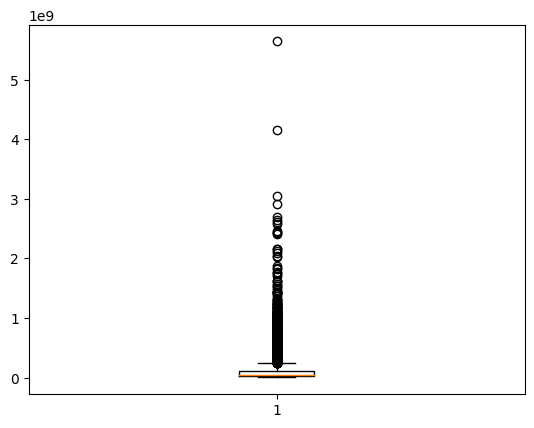

In [141]:
q1 = cost['R99']['value'].quantile(.25)
q3 = cost['R99']['value'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

print((len(cost['R99'][cost['R99']['value'] > upper_bound]) / len(cost['R99']))*100)

plt.boxplot(cost['R99']['value'])
plt.show()

In [142]:
cost['R99']

,Address,value
0,20001383916,145502000
1,20001383917,91743000
2,20001383919,14820000
3,20001383923,55897552
4,20001383926,36882552
...,...,...
18246,23006709817,71220000
18247,23006709820,95823400
18248,23006709823,53994000
18249,23006709826,48240000


In [143]:
print(r99['R99P3S01'].code.value_counts())
print('----------------------------------')
print(r99['R99P3S02'].code.value_counts())
print('----------------------------------')
print(r99['R99P3S03'].code.value_counts())

#P3S02 --> drug

code
11731    16673
11724    16179
11732    16144
11441    14348
11231    13895
         ...  
11239        6
11235        5
11221        4
11238        3
11247        2
Name: count, Length: 193, dtype: int64
----------------------------------
code
22111    1582
22113    1313
Name: count, dtype: int64
----------------------------------
code
31317    4854
31251    1606
31216    1121
31212    1082
31222    1007
         ... 
31237       8
31213       8
31257       7
31258       4
31214       1
Name: count, Length: 81, dtype: int64


***  محاسبه مجموع هزینه های غیر خوراکی ***

In [144]:
food_cost = {k : pd.DataFrame() for k in file_names}
food_cost['R99'] = pd.DataFrame(cost_sheet_divided['R99']['R99P3S01'].groupby('Address').agg({'value' : 'sum'})).reset_index()
food_cost['R99'].columns = ['Address', 'value']
food_cost['R99']

,Address,value
0,20001383916,16207000.0
1,20001383917,6821000.0
2,20001383919,6610000.0
3,20001383923,9410000.0
4,20001383926,23195000.0
...,...,...
18153,23006709817,13900000.0
18154,23006709820,17118000.0
18155,23006709823,20814000.0
18156,23006709826,13450000.0


In [145]:
print(f"intersection = {len(set(list(food_cost['R99'].Address)) & set(list(cost['R99'].Address)))}")
print(f"len cost.Address = {len(cost['R99'].Address)}")
print(f"len food_cost.Address = {len(food_cost['R99'].Address)}")

intersection = 18158
len cost.Address = 18251
len food_cost.Address = 18158


In [146]:
total_cost = {k : pd.DataFrame() for k in file_names}
total_cost['R99'] = pd.merge(cost['R99'], food_cost['R99'], how = 'outer', on = 'Address', )
total_cost['R99'].columns = ['Address', 'total_cost', 'edible_cost']
total_cost['R99'].loc[(total_cost['R99']['total_cost'].isna()) | (total_cost['R99']['edible_cost'].isna())]

,Address,total_cost,edible_cost
866,20102398421,6510000,NaN
877,20102398620,6000000,NaN
904,20103399129,6000000,NaN
917,20104399414,6000000,NaN
942,20105399921,10780000,NaN
...,...,...,...
17916,23002703424,15000000,NaN
17946,23002704113,15000000,NaN
18187,23006708422,12000000,NaN
18205,23006708826,15350000,NaN


Filling None value with median

In [147]:
total_cost_median = total_cost['R99'][~total_cost['R99'].isna()].median()
total_cost['R99'].fillna(total_cost_median, inplace = True)

In [148]:
total_cost['R99']['inedible_cost'] = total_cost['R99']['total_cost'] - total_cost['R99']['edible_cost']
total_cost['R99']

,Address,total_cost,edible_cost,inedible_cost
0,20001383916,145502000,16207000.0,129295000.0
1,20001383917,91743000,6821000.0,84922000.0
2,20001383919,14820000,6610000.0,8210000.0
3,20001383923,55897552,9410000.0,46487552.0
4,20001383926,36882552,23195000.0,13687552.0
...,...,...,...,...
18246,23006709817,71220000,13900000.0,57320000.0
18247,23006709820,95823400,17118000.0,78705400.0
18248,23006709823,53994000,20814000.0,33180000.0
18249,23006709826,48240000,13450000.0,34790000.0


In [149]:
print(f"percentage of family with negative inedible_cost = {len(total_cost['R99'].loc[total_cost['R99']['inedible_cost'] < 0]) / len(total_cost['R99']) * 100}")

percentage of family with negative inedible_cost = 0.38901977973809654


In [150]:
save_excel(total_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Total Cost For Each Family R99', 'xlsx')

OSError: Cannot save file into a non-existent directory: 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data'

***  محاسبه مجموع هزینه های حمل و نقل ***

In [ ]:
transportaion_codes = [71, 72, 72]
transportaion_cost = {k : pd.DataFrame() for k in file_names}

for code in transportaion_codes:
    new_cost = pd.DataFrame(r99['R99P3S13'][r99['R99P3S13']['code'].astype('str').str.startswith(f'{code}')])
    transportaion_cost['R99'] = pd.concat([transportaion_cost['R99'], new_cost])

transportaion_cost['R99']

,Address,code,value
750,10001001920,71314,500000
913,10005004613,71116,45000000
939,10009008508,71311,2000000
1090,10012010120,71116,850000000
1580,10010008920,71311,11000000
...,...,...,...
246267,13001375923,72119,2500000
246268,13001375923,72122,18000000
246285,13001369614,72117,4500000
246286,13001369614,72119,1000000


In [ ]:
transportaion_cost['R99'] = pd.DataFrame(transportaion_cost['R99'].groupby('Address').agg({'value' : 'sum'})).reset_index()
transportaion_cost['R99'].columns = ['Address', 'value']
transportaion_cost['R99']

,Address,value
0,10001000111,21400000
1,10001000117,21360000
2,10001000123,20800000
3,10001000211,4800000
4,10001000214,21100000
...,...,...
10720,13006383611,8100000
10721,13006383620,9600000
10722,13006383623,15700000
10723,13006383820,17900000


In [ ]:
save_excel(transportaion_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Transportation Cost R99', 'xlsx')